In [4]:
import pandas as pd

# List of file paths for different leagues
file_paths = [
    "/Users/Trymso/Desktop/Data _Prosjekt_S/1. Liga Polen - 2024 25.xlsx",
    "/Users/Trymso/Desktop/Data _Prosjekt_S/A-League 2024_25.xlsx",
    "/Users/Trymso/Desktop/Data _Prosjekt_S/Eerste Divisie - 2024 25.xlsx",
    "/Users/Trymso/Desktop/Data _Prosjekt_S/Segunda Liga Portugal - 2024_25.xlsx",
    "/Users/Trymso/Desktop/Data _Prosjekt_S/Cleaned_J_League_2_2024.xlsx"
    # Add more file paths here
]

# Read all datasets into a list of dataframes
dfs = [pd.read_excel(file) for file in file_paths]

In [6]:
df = pd.concat(dfs, ignore_index=True)

In [8]:
#exploring columns
columns_list = df.columns.tolist()
print(columns_list)

['Player', 'Team', 'Team within selected timeframe', 'Position', 'Age', 'Market value', 'Contract expires', 'Matches played', 'Minutes played', 'Goals', 'xG', 'Assists', 'xA', 'Duels per 90', 'Duels won, %', 'Birth country', 'Passport country', 'Foot', 'Height', 'Weight', 'On loan', 'Successful defensive actions per 90', 'Defensive duels per 90', 'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %', 'Sliding tackles per 90', 'PAdj Sliding tackles', 'Shots blocked per 90', 'Interceptions per 90', 'PAdj Interceptions', 'Fouls per 90', 'Yellow cards', 'Red cards', 'Successful attacking actions per 90', 'Non-penalty goals', 'Non-penalty goals per 90', 'xG per 90', 'Head goals', 'Head goals per 90', 'Shots per 90', 'Shots on target, %', 'Goal conversion, %', 'Assists per 90', 'Crosses per 90', 'Accurate crosses, %', 'Crosses from left flank per 90', 'Accurate crosses from left flank, %', 'Crosses from right flank per 90', 'Accurate crosses from right flank, %', 'Crosses to

In [10]:
df.Team.unique()

array(['Kotwica Kołobrzeg', 'Warta Poznań', 'Polonia Warszawa',
       'Tychy 71', 'Arka Gdynia', 'Znicz Pruszków', 'Ruch Chorzów',
       'Nieciecza', 'Miedź Legnica', 'Odra Opole', 'Wisła Kraków',
       'Pogoń Siedlce', 'Stal Rzeszów', 'Górnik Łęczna',
       'Stal Stalowa Wola', 'Chrobry Głogów', 'Łódzki KS', 'Wisła Płock',
       'RKC Waalwijk', 'Łódzki KS II', 'Łódzki KS U19', 'Bologna U20',
       'Wisła Kraków U17', 'Raków Częstochowa', 'Zagłębie Lubin',
       'Unia Swarzędz', 'Jagiellonia Białystok', 'Bordeaux',
       'Melbourne City', 'Western Sydney Wanderers', 'Melbourne Victory',
       'Perth Glory', 'Sydney', 'Adelaide United', 'Macarthur',
       'Newcastle Jets', 'Brisbane Roar', 'Central Coast Mariners',
       'Western Sydney Wanderers FC II', 'Auckland FC', 'Western United',
       'Wellington Phoenix', 'Adelaide United II',
       'Wellington Phoenix II', 'Bulls Academy', 'Melbourne City U21',
       'MVV', 'Telstar', 'AZ', 'Excelsior', 'AZ U19', 'PSV U19',
     

# Høyre Back

In [ ]:
## Z-Score // Outliers ##

In [125]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=180, min_minutes=700, min_age=20, max_age=30, position='RB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
# Metrics to be evenly weighted
original_metrics = ["Progressive runs per 90", "Dribbles per 90", "Offensive duels per 90",
                    "Shots per 90", "Aerial duels per 90", "Aerial duels won, %", 
                    "Interceptions per 90", "Deep completed crosses per 90"]

# Assign equal weights
weights = [1] * len(original_metrics)  # All metrics have equal weight

df_position = filter_position(df, original_metrics, weights)

df_hback = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", "Market value", 'Contract expires', "Z-Score", "Normalized Score (0-100)", "Progressive runs per 90", "Dribbles per 90", "Offensive duels per 90",
                    "Shots per 90", "Aerial duels per 90", "Aerial duels won, %", 
                    "Interceptions per 90", "Deep completed crosses per 90"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)

df_hback.head(15)


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/2839562321.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/2839562321.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/2839562321.py:41: SettingWithCopyWa

,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Z-Score,Normalized Score (0-100),Progressive runs per 90,Dribbles per 90,Offensive duels per 90,Shots per 90,Aerial duels per 90,"Aerial duels won, %",Interceptions per 90,Deep completed crosses per 90
581,K. Adamson,RB,Macarthur,21.0,right,185,1299,0,2025-06-30,2.675698,99.63,1.25,1.87,7.83,0.69,2.08,73.33,4.64,0.55
1090,I. Bronkhorst,RB,Excelsior,27.0,right,185,1724,350000,2025-06-30,1.917183,97.24,2.45,3.18,6.89,1.15,4.70,62.22,3.29,1.88
641,G. Cléùr,RB,Western Sydney Wanderers,26.0,right,186,785,350000,2025-06-30,1.639763,94.95,1.83,1.95,5.62,0.69,4.01,62.86,4.82,1.61
392,B. Jaroch,RB,Wisła Kraków,29.0,right,185,1716,250000,2025-06-30,1.293281,90.20,2.20,2.05,4.46,1.26,3.04,62.07,3.93,1.42
1151,D. Payne,RB,Volendam,22.0,right,182,1418,275000,2025-06-30,1.206660,88.62,0.70,1.33,4.00,0.32,2.60,65.85,4.38,0.51
965,M. Dağaşan,RB,PSV II,20.0,right,180,861,0,2025-06-30,1.186761,88.23,1.25,0.73,2.93,0.10,3.45,63.64,7.00,0.42
348,D. Sokół,"RWB, RB",Znicz Pruszków,25.0,right,185,1634,100000,NaN,1.115358,86.77,0.94,1.38,4.57,0.94,5.07,59.78,5.29,0.94
1818,I. Takahashi,RB,JEF United,26.0,right,180,3681,400000,2025-01-31,1.104823,86.54,1.61,1.78,3.52,1.00,3.18,63.08,3.84,0.81
2019,R. Ohata,"RCB, RB",ThespaKusatsu Gunma,27.0,NaN,180,1983,300000,2025-01-31,1.014691,84.49,0.59,0.95,2.27,0.50,5.22,63.48,4.40,0.64
1946,M. Moyo,"RB, RWB",Fujieda MYFC,23.0,right,181,1864,0,NaN,0.814527,79.23,3.09,4.97,10.19,0.97,5.26,46.79,3.96,1.11


In [ ]:
## SUM TOTAL SCORE ##

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def filter_position(df, metrics, height=180, min_minutes=700, min_age=20, max_age=30, position='RB'):
    """
    Filter keepers based on height, minutes played, age, and position, 
    and calculate a total score based on normalized metrics.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        height (int): Minimum height for the filter.
        min_minutes (int): Minimum minutes played for the filter.
        min_age (int): Minimum age for the filter.
        max_age (int): Maximum age for the filter.
        position (str): Position filter (default: 'GK').

    Returns:
        DataFrame: A filtered dataframe with the calculated total score.
    """
    # Filtrer dataene basert på kriterier
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ].copy()

    # Normaliser hver metrikk (Min-Max skalering)
    scaler = MinMaxScaler()
    df_filtered[metrics] = scaler.fit_transform(df_filtered[metrics])

    # Beregn total score ved å summere de normaliserte verdiene
    df_filtered["Total Score"] = df_filtered[metrics].sum(axis=1)

    # Sorter keeperne etter høyest score
    df_filtered = df_filtered.sort_values("Total Score", ascending=False)

    return df_filtered

# Oppdaterte metrikker med "Reflex Save Score" inkludert
original_metrics = ["Progressive runs per 90", "Dribbles per 90", "Offensive duels per 90",
                    "Shots per 90", "Aerial duels per 90", "Aerial duels won, %", 
                    "Interceptions per 90", "Deep completed crosses per 90"]

# Kjør funksjonen
df_position = filter_position(df, original_metrics)

# Sorter og vis de beste keeperne
df_hback = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", 
                         "Market value", 'Contract expires', "Total Score","Progressive runs per 90", "Dribbles per 90", "Offensive duels per 90",
                    "Shots per 90", "Aerial duels per 90", "Aerial duels won, %", 
                    "Interceptions per 90", "Deep completed crosses per 90"]].sort_values(
    by="Total Score", ascending=False
)
df_hback.head(10)


,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Total Score,Progressive runs per 90,Dribbles per 90,Offensive duels per 90,Shots per 90,Aerial duels per 90,"Aerial duels won, %",Interceptions per 90,Deep completed crosses per 90
1946,M. Moyo,"RB, RWB",Fujieda MYFC,23.0,right,181,1864,0,NaN,5.436863,1.000000,1.000000,1.000000,0.526946,0.616418,0.305054,0.398020,0.590426
1090,I. Bronkhorst,RB,Excelsior,27.0,right,185,1724,350000,2025-06-30,5.195664,0.761194,0.639839,0.652632,0.634731,0.532836,0.709086,0.265347,1.000000
217,K. Michalski,"RWB, RB",Warta Poznań,24.0,right,187,1264,200000,2026-06-30,4.918990,0.723881,0.659960,0.549474,0.844311,0.447761,0.434145,0.615842,0.643617
641,G. Cléùr,RB,Western Sydney Wanderers,26.0,right,186,785,350000,2025-06-30,4.380829,0.529851,0.392354,0.518947,0.359281,0.429851,0.725844,0.568317,0.856383
290,J. Bednarczyk,"RB, RWB",Górnik Łęczna,25.0,right,184,1586,200000,2025-06-30,4.347623,0.716418,0.478873,0.452632,0.622754,0.288060,0.389107,0.702970,0.696809
392,B. Jaroch,RB,Wisła Kraków,29.0,right,185,1716,250000,2025-06-30,4.315458,0.667910,0.412475,0.396842,0.700599,0.285075,0.705158,0.392079,0.755319
2122,T. Iida,"RWB, RB",Ventforet Kofu,30.0,right,180,1973,250000,2025-01-31,4.162348,0.850746,0.633803,0.523158,0.574850,0.083582,0.495156,0.128713,0.872340
15,T. Zaviyskyi,"RWB, RB",Nieciecza,29.0,both,182,1120,0,NaN,3.842389,0.388060,0.645875,0.476842,0.862275,0.000000,0.389107,0.394059,0.686170
348,D. Sokół,"RWB, RB",Znicz Pruszków,25.0,right,185,1634,100000,NaN,3.787471,0.197761,0.277666,0.408421,0.508982,0.588060,0.645195,0.661386,0.500000
2120,T. Hara,"RB, RCB",Shimizu S-Pulse,26.0,right,180,2231,450000,2025-01-31,3.770991,0.585821,0.478873,0.436842,0.502994,0.361194,0.478397,0.453465,0.473404


In [ ]:
## RADAR ##

Radar plot saved as bobek_radar.png


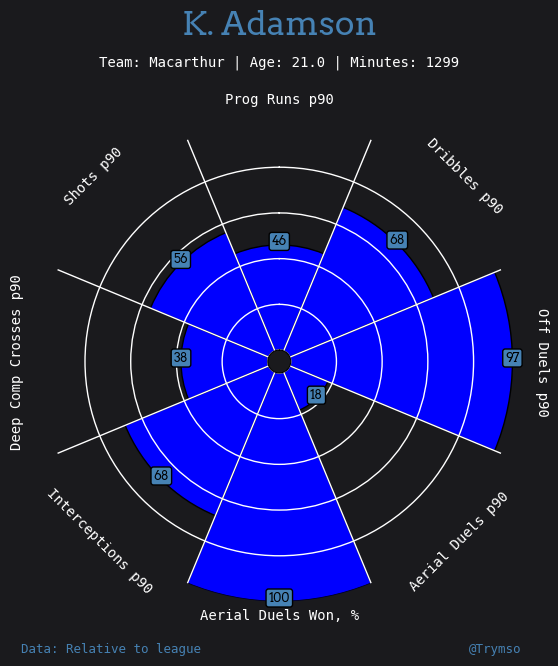

In [127]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager


def plot_radar(df_hback):

    font_path = 'Arvo-Regular.ttf'
    font_props = font_manager.FontProperties(fname=font_path)

    df_hback['Prog Runs p90'] = (df_hback['Progressive runs per 90'].rank(pct=True) * 100).astype(int)
    df_hback['Dribbles p90'] = (df_hback['Dribbles per 90'].rank(pct=True) * 100).astype(int)
    df_hback['Off Duels p90'] = (df_hback['Offensive duels per 90'].rank(pct=True) * 100).astype(int)
    df_hback['Aerial Duels p90'] = (df_hback['Aerial duels per 90'].rank(pct=True) * 100).astype(int)
    df_hback['Aerial Duels Won, %'] = (df_hback['Aerial duels won, %'].rank(pct=True) * 100).astype(int)
    df_hback['Interceptions p90'] = (df_hback['Interceptions per 90'].rank(pct=True) * 100).astype(int)
    df_hback['Deep Comp Crosses p90'] = (df_hback['Deep completed crosses per 90'].rank(pct=True) * 100).astype(int)
    df_hback['Shots p90'] = (df_hback['Shots per 90'].rank(pct=True) * 100).astype(int)



    #Filtering and sorting which columns to use in radar
    columns_to_plot = [
        'Prog Runs p90', 'Dribbles p90', 'Off Duels p90', 'Aerial Duels p90',
        'Aerial Duels Won, %', 'Interceptions p90', 'Deep Comp Crosses p90', 'Shots p90'
    ]

    #Creating min and max value for radar
    radar = Radar(
        params=columns_to_plot,
        min_range=[0 for _ in columns_to_plot],
        max_range=[100 for _ in columns_to_plot]
    )

    slice_colors = ["#0000FF"] * 8 #+ ["#4682B4"] * 3



    #Players to plot
    #bobek = df_keeper[df_keeper['Player'] == 'A. Bobek']    
    player = df_hback[df_hback['Player'] == 'K. Adamson']



    # Setup the pizza plot
    pizza = PyPizza(
        params=columns_to_plot,
        background_color='#1A1A1D',
        straight_line_color='white',
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_color='white',
        other_circle_ls='-',
        other_circle_lw=1
    )

    # Create the figure and plot
    fig, ax = pizza.make_pizza(
        figsize=(8, 8),  # Increase the figure size
        slice_colors=slice_colors, 
        values=list(player[columns_to_plot].values.flatten()),
        kwargs_values=dict(
            color='#000000', fontsize=9, fontproperties=font_props, 
            bbox={
                'edgecolor': 'black',
                'facecolor': '#4682B4',    #A52A2A  #8B0000 #0000FF #DA291C
                "boxstyle": 'round, pad= .2',
                "lw": 1
            }
        ),

        kwargs_slices=dict(
            facecolor="#FFFFFF",  # New color (example: red)
            edgecolor="black",  # White edge for the slices
            linewidth=1
        ),

        kwargs_params=dict(
            color='#FFFFFF',  # White color for the labels (change as needed)
            fontsize=10,  # Font size for the labels
            fontproperties='monospace' # Custom font
        )
    )

    # Adjust the margins to add space around the plot
    fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

    fig.text(
    0.5, 0.87,
    f"Team: {player['Team'].iloc[0]} | Age: {player['Age'].iloc[0]} | Minutes: {player['Minutes played'].iloc[0]}",
    size=10, color="white", ha="center", fontproperties='monospace'
)



    # Add the title
    ax.text(x=.5, y=1.20, s=player['Player'].iloc[0], fontsize=24, weight='bold', c='#4682B4', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


    ax.text(
        x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
        s='Data: Relative to league',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )



    ax.text(
        x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
        s='@Trymso',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )

    fig.savefig('/Users/Trymso/Desktop/bobek_radar.png', dpi=300, bbox_inches='tight')  # Save directly
    print("Radar plot saved as bobek_radar.png")  # Confirmation message


plot_radar(df_hback)

# Stopper 1

In [ ]:
## Z-Score // Outliers ##

In [47]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=188, min_minutes=700, min_age=20, max_age=28, position='LCB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
# Metrics to be evenly weighted
original_metrics = ["Accelerations per 90", "Opponent half recoveries per 90", "Loose ball duels per 90", 
                    "Sliding tackles per 90", "Aerial duels per 90", "Aerial duels won, %"]

# Assign equal weights
weights = [1] * len(original_metrics)  # All metrics have equal weight

df_position = filter_position(df, original_metrics, weights)

df_vstopper = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", "Market value", 'Contract expires', "Z-Score", "Normalized Score (0-100)", "Accelerations per 90", "Opponent half recoveries per 90", "Loose ball duels per 90", 
                    "Sliding tackles per 90", "Aerial duels per 90", "Aerial duels won, %", "Defensive duels per 90",
                        "Defensive duels won, %"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)

df_vstopper.head(10)


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/960853633.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/960853633.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/960853633.py:41: SettingWithCopyWarni

,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Z-Score,Normalized Score (0-100),Accelerations per 90,Opponent half recoveries per 90,Loose ball duels per 90,Sliding tackles per 90,Aerial duels per 90,"Aerial duels won, %",Defensive duels per 90,"Defensive duels won, %"
1145,D. Tomas,"RCB, LCB",ADO Den Haag,27.0,right,193,1487,400000,2026-06-30,2.363767,99.10,0.00,4.06,3.88,0.30,6.78,73.21,4.36,75.00
516,N. Pijnaker,LCB,Auckland FC,25.0,left,192,1282,150000,2026-06-30,1.463369,92.83,0.00,2.53,2.39,0.49,3.86,70.91,4.28,68.85
1195,B. Koglin,"RCB, LCB",Roda JC,28.0,right,189,912,425000,2025-06-30,1.341451,91.01,0.00,3.26,1.58,0.00,5.92,68.33,5.72,72.41
12,W. Biedrzycki,"LCB, RCB",Wisła Kraków,27.0,right,192,768,300000,2026-06-30,1.184860,88.20,0.00,1.81,2.95,0.47,7.38,65.08,4.10,54.29
1037,J. Scholz,LCB,Helmond Sport,25.0,left,189,1505,150000,2026-06-30,0.830293,79.68,0.00,1.85,2.39,0.30,5.98,64.00,3.83,70.31
1581,Filipe Relvas,"LB, LCB",Portimonense,25.0,left,192,1547,3500000,2026-06-30,0.802331,78.88,0.06,1.61,1.46,0.23,3.72,67.19,4.95,69.41
1314,Rúben Pereira,"LCB, RCB, CB",Penafiel,26.0,right,193,1749,500000,2025-06-30,0.583103,72.01,0.05,0.77,1.34,0.15,4.48,65.52,4.37,74.12
1587,Felipe Silva,LCB,Porto II,22.0,left,190,1611,250000,2027-06-30,0.517111,69.75,0.00,1.32,1.36,0.22,5.08,63.74,4.64,62.65
176,M. Broda,LCB,Górnik Łęczna,24.0,NaN,192,1129,0,2025-06-30,0.463423,67.85,0.08,1.99,1.83,0.16,6.14,61.04,4.54,71.93
746,Y. M'Bemba,LCB,Dordrecht,23.0,right,190,1367,0,NaN,0.370587,64.45,0.00,1.38,2.11,0.00,3.09,63.83,6.39,76.29


In [ ]:
## SUM TOTAL SCORE ##

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def filter_position(df, metrics, height=188, min_minutes=700, min_age=20, max_age=28, position='LCB'):
    """
    Filter keepers based on height, minutes played, age, and position, 
    and calculate a total score based on normalized metrics.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        height (int): Minimum height for the filter.
        min_minutes (int): Minimum minutes played for the filter.
        min_age (int): Minimum age for the filter.
        max_age (int): Maximum age for the filter.
        position (str): Position filter (default: 'GK').

    Returns:
        DataFrame: A filtered dataframe with the calculated total score.
    """
    # Filtrer dataene basert på kriterier
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ].copy()

    # Normaliser hver metrikk (Min-Max skalering)
    scaler = MinMaxScaler()
    df_filtered[metrics] = scaler.fit_transform(df_filtered[metrics])

    # Beregn total score ved å summere de normaliserte verdiene
    df_filtered["Total Score"] = df_filtered[metrics].sum(axis=1)

    # Sorter keeperne etter høyest score
    df_filtered = df_filtered.sort_values("Total Score", ascending=False)

    return df_filtered

# Oppdaterte metrikker med "Reflex Save Score" inkludert
original_metrics = ["Accelerations per 90", "Opponent half recoveries per 90", "Loose ball duels per 90", 
                    "Sliding tackles per 90", "Aerial duels per 90", "Aerial duels won, %"]

# Kjør funksjonen
df_position = filter_position(df, original_metrics)

# Sorter og vis de beste keeperne
df_vstopper = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", 
                         "Market value", 'Contract expires', "Total Score","Accelerations per 90", "Opponent half recoveries per 90", "Loose ball duels per 90", 
                    "Sliding tackles per 90", "Aerial duels per 90", "Aerial duels won, %", "Defensive duels per 90",
                        "Defensive duels won, %"]].sort_values(
    by="Total Score", ascending=False
)
df_vstopper.head(10)


,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Total Score,Accelerations per 90,Opponent half recoveries per 90,Loose ball duels per 90,Sliding tackles per 90,Aerial duels per 90,"Aerial duels won, %",Defensive duels per 90,"Defensive duels won, %"
1145,D. Tomas,"RCB, LCB",ADO Den Haag,27.0,right,193,1487,400000,2026-06-30,4.507533,0.000000,1.000000,1.000000,0.612245,0.895288,1.000000,4.36,75.00
1109,G. Blancquart,"RCB, LCB",VVV Venlo,20.0,NaN,192,1216,0,2026-06-30,4.039631,1.000000,0.419453,0.989247,0.755102,0.357766,0.518062,6.66,68.89
12,W. Biedrzycki,"LCB, RCB",Wisła Kraków,27.0,right,192,768,300000,2026-06-30,3.714292,0.000000,0.316109,0.666667,0.959184,1.000000,0.772333,4.10,54.29
516,N. Pijnaker,LCB,Auckland FC,25.0,left,192,1282,150000,2026-06-30,3.322186,0.000000,0.534954,0.465950,1.000000,0.385689,0.935592,4.28,68.85
783,T. Oude Kotte,LCB,Roda JC,28.0,left,188,1877,300000,2026-06-30,3.104909,0.633333,0.422492,0.573477,0.591837,0.322862,0.560907,5.99,70.40
1037,J. Scholz,LCB,Helmond Sport,25.0,left,189,1505,150000,2026-06-30,2.904223,0.000000,0.328267,0.465950,0.612245,0.755672,0.742089,3.83,70.31
925,M. Waem,LCB,ADO Den Haag,24.0,left,189,1519,650000,2026-06-30,2.842864,0.400000,0.595745,0.501792,0.367347,0.476440,0.501540,4.80,71.60
176,M. Broda,LCB,Górnik Łęczna,24.0,NaN,192,1129,0,2025-06-30,2.672045,0.266667,0.370821,0.265233,0.326531,0.783595,0.659199,4.54,71.93
433,A. Edmundsson,"CB, LCB",Wisła Płock,24.0,right,193,1352,200000,2026-06-30,2.659756,0.000000,0.288754,0.318996,0.959184,0.710297,0.382526,6.39,73.96
1355,Pedro Rosas,"LB, LCB",Felgueiras 1932,24.0,left,189,920,125000,2025-06-30,2.603876,0.733333,0.398176,0.333333,0.224490,0.284468,0.630076,4.92,57.78


In [ ]:
## RADAR ##

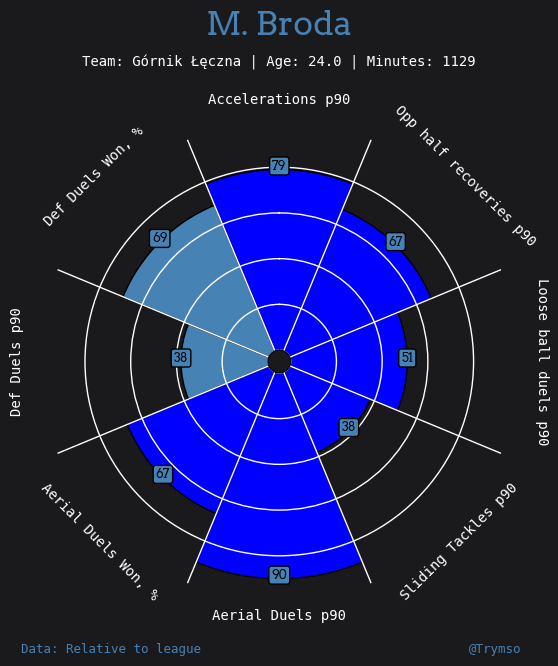

In [55]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager



def plot_radar(df_vstopper):

    font_path = 'Arvo-Regular.ttf'
    font_props = font_manager.FontProperties(fname=font_path)

    df_vstopper['Accelerations p90'] = (df_vstopper['Accelerations per 90'].rank(pct=True) * 100).astype(int)
    df_vstopper['Opp half recoveries p90'] = (df_vstopper['Opponent half recoveries per 90'].rank(pct=True) * 100).astype(int)
    df_vstopper['Loose ball duels p90'] = (df_vstopper['Loose ball duels per 90'].rank(pct=True) * 100).astype(int)
    df_vstopper['Sliding Tackles p90'] = (df_vstopper['Sliding tackles per 90'].rank(pct=True) * 100).astype(int)
    df_vstopper['Aerial Duels p90'] = (df_vstopper['Aerial duels per 90'].rank(pct=True) * 100).astype(int)
    df_vstopper['Aerial Duels Won, %'] = (df_vstopper['Aerial duels won, %'].rank(pct=True) * 100).astype(int)
    df_vstopper['Def Duels p90'] = (df_vstopper['Defensive duels per 90'].rank(pct=True) * 100).astype(int)
    df_vstopper['Def Duels Won, %'] = (df_vstopper['Defensive duels won, %'].rank(pct=True) * 100).astype(int)



    #Filtering and sorting which columns to use in radar
    columns_to_plot = [
        'Accelerations p90', 'Opp half recoveries p90', 'Loose ball duels p90', 'Sliding Tackles p90',
        'Aerial Duels p90', 'Aerial Duels Won, %', 'Def Duels p90', 'Def Duels Won, %'
    ]

    #Creating min and max value for radar
    radar = Radar(
        params=columns_to_plot,
        min_range=[0 for _ in columns_to_plot],
        max_range=[100 for _ in columns_to_plot]
    )

    slice_colors = ["#0000FF"] * 6 + ["#4682B4"] * 2



    #Players to plot
    #bobek = df_keeper[df_keeper['Player'] == 'A. Bobek']    
    player = df_vstopper[df_vstopper['Player'] == 'M. Broda']



    # Setup the pizza plot
    pizza = PyPizza(
        params=columns_to_plot,
        background_color='#1A1A1D',
        straight_line_color='white',
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_color='white',
        other_circle_ls='-',
        other_circle_lw=1
    )

    # Create the figure and plot
    fig, ax = pizza.make_pizza(
        figsize=(8, 8),  # Increase the figure size
        slice_colors=slice_colors, 
        values=list(player[columns_to_plot].values.flatten()),
        kwargs_values=dict(
            color='#000000', fontsize=9, fontproperties=font_props, 
            bbox={
                'edgecolor': 'black',
                'facecolor': '#4682B4',    #A52A2A  #8B0000 #0000FF #DA291C
                "boxstyle": 'round, pad= .2',
                "lw": 1
            }
        ),

        kwargs_slices=dict(
            facecolor="#FFFFFF",  # New color (example: red)
            edgecolor="black",  # White edge for the slices
            linewidth=1
        ),

        kwargs_params=dict(
            color='#FFFFFF',  # White color for the labels (change as needed)
            fontsize=10,  # Font size for the labels
            fontproperties='monospace' # Custom font
        )
    )

    # Adjust the margins to add space around the plot
    fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

    fig.text(
    0.5, 0.87,
    f"Team: {player['Team'].iloc[0]} | Age: {player['Age'].iloc[0]} | Minutes: {player['Minutes played'].iloc[0]}",
    size=10, color="white", ha="center", fontproperties='monospace'
)



    # Add the title
    ax.text(x=.5, y=1.20, s=player['Player'].iloc[0], fontsize=24, weight='bold', c='#4682B4', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


    ax.text(
        x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
        s='Data: Relative to league',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )



    ax.text(
        x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
        s='@Trymso',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )

    #fig.savefig('/Users/Trymso/Desktop/bobek_radar.png', dpi=300, bbox_inches='tight')  # Save directly
    #print("Radar plot saved as bobek_radar.png")  # Confirmation message


plot_radar(df_vstopper)

# Høyre Stopper

In [ ]:
## Z-SCORE ##

In [58]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=190, min_minutes=700, min_age=20, max_age=30, position='CB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
# Metrics to be evenly weighted
original_metrics = ["Aerial duels per 90", "Aerial duels won, %", "Head goals per 90", 
                    "Shots per 90", "Recoveries per 90"]

# Assign equal weights
weights = [1] * len(original_metrics)  # All metrics have equal weight

df_position = filter_position(df, original_metrics, weights)

df_hstopper = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", "Market value", 'Contract expires', "Z-Score", "Normalized Score (0-100)", "Aerial duels per 90", "Aerial duels won, %", "Head goals per 90", 
                    "Shots per 90", "Recoveries per 90", "Defensive duels per 90", "Defensive duels won, %", "Interceptions per 90"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)

df_hstopper.head(10)


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/1448977932.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/1448977932.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/1448977932.py:41: SettingWithCopyWa

,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Z-Score,Normalized Score (0-100),Aerial duels per 90,"Aerial duels won, %",Head goals per 90,Shots per 90,Recoveries per 90,Defensive duels per 90,"Defensive duels won, %",Interceptions per 90
1145,D. Tomas,"RCB, LCB",ADO Den Haag,27.0,right,193,1487,400000,2026-06-30,2.323315,98.99,6.78,73.21,0.00,0.97,16.53,4.36,75.00,4.30
2112,T. Ando,"RCB, CB",Oita Trinita,26.0,right,190,3611,0,2026-01-31,1.637769,94.93,8.25,67.07,0.00,0.60,15.50,4.98,79.00,6.16
1171,C. Widell,RCB,Excelsior,21.0,right,192,1998,700000,2026-06-30,1.624216,94.78,6.44,69.23,0.00,0.54,15.09,4.64,66.02,5.41
1513,J. Lomboto,"CB, RCB",Torreense,22.0,right,191,1093,0,NaN,1.271843,89.83,5.11,70.97,0.08,1.07,10.95,5.60,69.12,4.53
516,N. Pijnaker,LCB,Auckland FC,25.0,left,192,1282,150000,2026-06-30,1.088880,86.19,3.86,70.91,0.07,0.49,11.23,4.28,68.85,5.41
12,W. Biedrzycki,"LCB, RCB",Wisła Kraków,27.0,right,192,768,300000,2026-06-30,1.050480,85.33,7.38,65.08,0.00,1.29,12.47,4.10,54.29,3.28
709,A. Šušnjar,"RCB, LCB, CB",Newcastle Jets,29.0,left,192,788,300000,2026-06-30,0.964646,83.26,3.77,69.70,0.00,0.80,11.19,4.68,63.41,4.45
1965,Mendes,"LCB, RCB",JEF United,29.0,left,190,1417,250000,2025-01-31,0.909305,81.84,8.19,63.57,0.06,0.38,12.77,5.59,63.64,4.89
739,Ö. Aktas,RCB,MVV,27.0,right,190,1743,400000,2025-06-30,0.863000,80.59,6.35,65.04,0.00,0.52,12.65,5.27,64.71,6.09
872,R. Ketting,"RCB, CB",VVV Venlo,29.0,left,190,942,425000,2025-06-30,0.833635,79.78,6.21,64.62,0.10,1.05,12.32,5.83,67.21,4.97


In [ ]:
## TOTAL SUM SCORE ##

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def filter_position(df, metrics, height=190, min_minutes=700, min_age=20, max_age=30, position='CB'):
    """
    Filter keepers based on height, minutes played, age, and position, 
    and calculate a total score based on normalized metrics.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        height (int): Minimum height for the filter.
        min_minutes (int): Minimum minutes played for the filter.
        min_age (int): Minimum age for the filter.
        max_age (int): Maximum age for the filter.
        position (str): Position filter (default: 'GK').

    Returns:
        DataFrame: A filtered dataframe with the calculated total score.
    """
    # Filtrer dataene basert på kriterier
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ].copy()

    # Normaliser hver metrikk (Min-Max skalering)
    scaler = MinMaxScaler()
    df_filtered[metrics] = scaler.fit_transform(df_filtered[metrics])

    # Beregn total score ved å summere de normaliserte verdiene
    df_filtered["Total Score"] = df_filtered[metrics].sum(axis=1)

    # Sorter keeperne etter høyest score
    df_filtered = df_filtered.sort_values("Total Score", ascending=False)

    return df_filtered

# Oppdaterte metrikker med "Reflex Save Score" inkludert
original_metrics = ["Aerial duels per 90", "Aerial duels won, %", "Head goals per 90", 
                    "Shots per 90", "Recoveries per 90"]

# Kjør funksjonen
df_position = filter_position(df, original_metrics)

# Sorter og vis de beste keeperne
df_hstopper = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", 
                         "Market value", 'Contract expires', "Total Score","Aerial duels per 90", "Aerial duels won, %", "Head goals per 90", 
                    "Shots per 90", "Recoveries per 90", "Defensive duels per 90", "Defensive duels won, %", "Interceptions per 90"]].sort_values(
    by="Total Score", ascending=False
)
df_hstopper.head(10)


,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Total Score,Aerial duels per 90,"Aerial duels won, %",Head goals per 90,Shots per 90,Recoveries per 90,Defensive duels per 90,"Defensive duels won, %",Interceptions per 90
872,R. Ketting,"RCB, CB",VVV Venlo,29.0,left,190,942,425000,2025-06-30,3.541054,0.659432,0.701425,0.909091,0.800000,0.471106,5.83,67.21,4.97
1145,D. Tomas,"RCB, LCB",ADO Den Haag,27.0,right,193,1487,400000,2026-06-30,3.487924,0.754591,1.000000,0.000000,0.733333,1.000000,4.36,75.00,4.30
1513,J. Lomboto,"CB, RCB",Torreense,22.0,right,191,1093,0,NaN,3.240868,0.475793,0.922141,0.727273,0.816667,0.298995,5.60,69.12,4.53
407,A. Uryga,RCB,Wisła Kraków,30.0,right,191,1604,250000,2026-06-30,3.223076,0.839733,0.647897,0.545455,0.858333,0.331658,5.05,66.67,5.05
2112,T. Ando,"RCB, CB",Oita Trinita,26.0,right,190,3611,0,2026-01-31,3.082186,1.000000,0.786583,0.000000,0.425000,0.870603,4.98,79.00,6.16
754,X. Mbuyamba,RCB,Volendam,23.0,right,195,1794,1000000,2025-06-30,3.063310,0.452421,0.597150,0.909091,0.675000,0.429648,6.37,70.08,5.47
12,W. Biedrzycki,"LCB, RCB",Wisła Kraków,27.0,right,192,768,300000,2026-06-30,3.062122,0.854758,0.717414,0.000000,1.000000,0.489950,4.10,54.29,3.28
1965,Mendes,"LCB, RCB",JEF United,29.0,left,190,1417,250000,2025-01-31,2.969671,0.989983,0.664929,0.545455,0.241667,0.527638,5.59,63.64,4.89
201,Kike Hermoso,RCB,Arka Gdynia,25.0,right,190,1198,200000,2025-06-30,2.777240,0.964942,0.339590,0.727273,0.491667,0.253769,5.78,67.53,4.21
1708,André Almeida,RCB,Academico Viseu,29.0,right,191,918,400000,2026-06-30,2.776177,0.637730,0.697949,0.909091,0.250000,0.281407,3.33,67.65,5.49


In [ ]:
## RADAR ##

Radar plot saved as bobek_radar.png


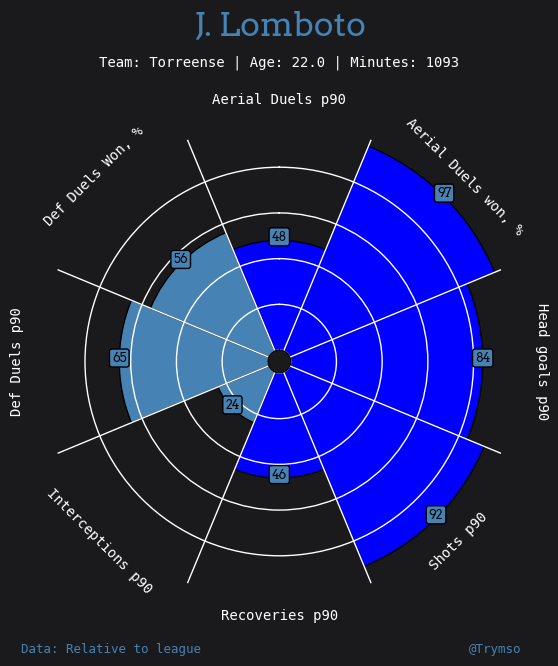

In [133]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager



def plot_radar(df_hstopper):

    font_path = 'Arvo-Regular.ttf'
    font_props = font_manager.FontProperties(fname=font_path)

    df_hstopper['Aerial Duels p90'] = (df_hstopper['Aerial duels per 90'].rank(pct=True) * 100).astype(int)
    df_hstopper['Aerial Duels won, %'] = (df_hstopper['Aerial duels won, %'].rank(pct=True) * 100).astype(int)
    df_hstopper['Head goals p90'] = (df_hstopper['Head goals per 90'].rank(pct=True) * 100).astype(int)
    df_hstopper['Shots p90'] = (df_hstopper['Shots per 90'].rank(pct=True) * 100).astype(int)
    df_hstopper['Recoveries p90'] = (df_hstopper['Recoveries per 90'].rank(pct=True) * 100).astype(int)
    df_hstopper['Interceptions p90'] = (df_hstopper['Interceptions per 90'].rank(pct=True) * 100).astype(int)
    df_hstopper['Def Duels p90'] = (df_hstopper['Defensive duels per 90'].rank(pct=True) * 100).astype(int)
    df_hstopper['Def Duels Won, %'] = (df_hstopper['Defensive duels won, %'].rank(pct=True) * 100).astype(int)



    #Filtering and sorting which columns to use in radar
    columns_to_plot = [
        'Aerial Duels p90', 'Aerial Duels won, %', 'Head goals p90', 'Shots p90',
        'Recoveries p90', 'Interceptions p90', 'Def Duels p90', 'Def Duels Won, %'
    ]

    #Creating min and max value for radar
    radar = Radar(
        params=columns_to_plot,
        min_range=[0 for _ in columns_to_plot],
        max_range=[100 for _ in columns_to_plot]
    )

    slice_colors = ["#0000FF"] * 5 + ["#4682B4"] * 3



    #Players to plot
    #bobek = df_keeper[df_keeper['Player'] == 'A. Bobek']    
    player = df_hstopper[df_hstopper['Player'] == 'J. Lomboto']



    # Setup the pizza plot
    pizza = PyPizza(
        params=columns_to_plot,
        background_color='#1A1A1D',
        straight_line_color='white',
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_color='white',
        other_circle_ls='-',
        other_circle_lw=1
    )

    # Create the figure and plot
    fig, ax = pizza.make_pizza(
        figsize=(8, 8),  # Increase the figure size
        slice_colors=slice_colors, 
        values=list(player[columns_to_plot].values.flatten()),
        kwargs_values=dict(
            color='#000000', fontsize=9, fontproperties=font_props, 
            bbox={
                'edgecolor': 'black',
                'facecolor': '#4682B4',    #A52A2A  #8B0000 #0000FF #DA291C
                "boxstyle": 'round, pad= .2',
                "lw": 1
            }
        ),

        kwargs_slices=dict(
            facecolor="#FFFFFF",  # New color (example: red)
            edgecolor="black",  # White edge for the slices
            linewidth=1
        ),

        kwargs_params=dict(
            color='#FFFFFF',  # White color for the labels (change as needed)
            fontsize=10,  # Font size for the labels
            fontproperties='monospace' # Custom font
        )
    )

    # Adjust the margins to add space around the plot
    fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

    fig.text(
    0.5, 0.87,
    f"Team: {player['Team'].iloc[0]} | Age: {player['Age'].iloc[0]} | Minutes: {player['Minutes played'].iloc[0]}",
    size=10, color="white", ha="center", fontproperties='monospace'
)



    # Add the title
    ax.text(x=.5, y=1.20, s=player['Player'].iloc[0], fontsize=24, weight='bold', c='#4682B4', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


    ax.text(
        x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
        s='Data: Relative to league',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )



    ax.text(
        x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
        s='@Trymso',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )

    fig.savefig('/Users/Trymso/Desktop/bobek_radar.png', dpi=300, bbox_inches='tight')  # Save directly
    print("Radar plot saved as bobek_radar.png")  # Confirmation message


plot_radar(df_hstopper)

# Venstre Back

In [ ]:
## Z-SCORE ##

In [109]:
import numpy as np
from scipy.stats import norm

def filter_position(df, metrics, weights, height=180, min_minutes=700, min_age=20, max_age=30, position='LB'):
    """
    Filter strikers based on height, minutes played, age, and position, 
    and calculate a composite score based on the given metrics and weights.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        weights (list): List of weights corresponding to the metrics.
        height (int): Minimum height for the filter. Default is 180 cm.
        min_minutes (int): Minimum minutes played for the filter. Default is 900.
        max_age (int): Maximum age for the filter. Default is 30.
        position (str): Position filter (e.g., 'CF'). Default is 'CF'.

    Returns:
        DataFrame: A filtered dataframe with the calculated composite score and normalized score.
    """
    # Filter the dataframe
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ]

    # Calculate the composite score for the given metrics
    df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)

    # Calculate the mean and standard deviation for the composite score
    mean_score = df_filtered["Composite Score"].mean()
    std_score = df_filtered["Composite Score"].std()

    # Calculate the z-scores
    df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score

    # Map the z-scores to a range of 0 to 100
    df_filtered["Normalized Score (0-100)"] = (norm.cdf(df_filtered["Z-Score"]) * 100).round(2)

    return df_filtered

# Example usage
# Metrics to be evenly weighted
original_metrics = ["Crosses per 90", "Accurate crosses, %", "Progressive runs per 90", "Shots per 90",
                    "Deep completed crosses per 90", "Defensive duels per 90", "Defensive duels won, %",
                    "Interceptions per 90", "Aerial duels per 90"]

# Assign equal weights
weights = [1] * len(original_metrics)  # All metrics have equal weight

df_position = filter_position(df, original_metrics, weights)

df_vback = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", "Market value", 'Contract expires', "Z-Score", "Normalized Score (0-100)", "Crosses per 90", "Accurate crosses, %", "Progressive runs per 90", "Shots per 90",
"Deep completed crosses per 90", "Defensive duels per 90", "Defensive duels won, %",
"Interceptions per 90", "Aerial duels per 90"]].sort_values(
    by="Normalized Score (0-100)", ascending=False
)

df_vback.head(15)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/3294411218.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Composite Score"] = np.dot(df_filtered[metrics], weights)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/3294411218.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Z-Score"] = (df_filtered["Composite Score"] - mean_score) / std_score
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_19580/3294411218.py:41: SettingWithCopyWa

,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Z-Score,Normalized Score (0-100),Crosses per 90,"Accurate crosses, %",Progressive runs per 90,Shots per 90,Deep completed crosses per 90,Defensive duels per 90,"Defensive duels won, %",Interceptions per 90,Aerial duels per 90
1246,Y. Kobayashi,"LCB, LB",Portimonense,24.0,left,185,875,650000,2027-06-30,3.468038,99.97,0.12,100.00,0.46,0.12,0.12,3.93,52.94,5.31,3.58
1760,D. Nakashio,"LCB, LB",ThespaKusatsu Gunma,27.0,left,181,2387,350000,2025-01-31,1.286587,90.09,1.40,48.65,0.53,0.23,0.68,4.83,69.53,4.37,5.09
171,M. Dijaković,"LCB, LB",Tychy 71,22.0,left,185,1130,250000,2025-06-30,0.943359,82.73,1.51,42.11,2.15,0.24,0.40,7.73,65.98,6.45,3.82
1538,Henrique Gomes,LB,Academico Viseu,29.0,left,185,812,225000,2025-06-30,0.826857,79.58,1.33,33.33,0.67,0.22,0.44,8.31,76.00,5.54,2.88
647,F. De Vries,LB,Auckland FC,30.0,left,188,1174,375000,2026-06-30,0.820578,79.41,4.29,35.71,1.00,0.31,1.61,7.74,70.30,4.45,3.22
371,D. Barauskas,"LB, LCB",Górnik Łęczna,27.0,left,188,1157,175000,2025-06-30,0.781511,78.27,1.01,38.46,0.47,0.23,0.47,5.99,72.73,4.82,3.89
1139,D. Vos,"LCB, LB",Emmen,23.0,left,181,1300,350000,2026-06-30,0.773838,78.05,0.83,50.00,1.11,0.42,0.35,6.16,64.04,3.18,1.87
798,T. Douglas,LB,Eindhoven,23.0,left,186,1466,150000,2025-06-30,0.651755,74.27,0.98,43.75,0.86,0.49,0.37,8.53,63.31,4.54,3.38
518,N. Paull,"LCB, LB",Central Coast Mariners,21.0,left,185,1037,0,2025-06-30,0.560367,71.24,0.26,33.33,2.26,0.43,0.09,6.16,74.65,5.12,2.60
1137,D. Warmerdam,"LCB, LB",Excelsior,29.0,left,180,1836,650000,2026-06-30,0.472467,68.17,0.74,40.00,0.78,0.25,0.34,6.18,67.46,3.97,3.92


In [ ]:
## TOTAL SUM SCORE ##

In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def filter_position(df, metrics, height=180, min_minutes=700, min_age=20, max_age=30, position='LB'):
    """
    Filter keepers based on height, minutes played, age, and position, 
    and calculate a total score based on normalized metrics.

    Parameters:
        df (DataFrame): The input dataframe.
        metrics (list): List of metric column names to calculate the score.
        height (int): Minimum height for the filter.
        min_minutes (int): Minimum minutes played for the filter.
        min_age (int): Minimum age for the filter.
        max_age (int): Maximum age for the filter.
        position (str): Position filter (default: 'GK').

    Returns:
        DataFrame: A filtered dataframe with the calculated total score.
    """
    # Filtrer dataene basert på kriterier
    df_filtered = df[
        (df['Height'] >= height) &
        (df['Minutes played'] >= min_minutes) &
        (df['Position'].str.contains(position)) &
        (df['Age'] <= max_age) &
        (df['Age'] >= min_age)
    ].copy()

    # Normaliser hver metrikk (Min-Max skalering)
    scaler = MinMaxScaler()
    df_filtered[metrics] = scaler.fit_transform(df_filtered[metrics])

    # Beregn total score ved å summere de normaliserte verdiene
    df_filtered["Total Score"] = df_filtered[metrics].sum(axis=1)

    # Sorter keeperne etter høyest score
    df_filtered = df_filtered.sort_values("Total Score", ascending=False)

    return df_filtered

# Oppdaterte metrikker med "Reflex Save Score" inkludert
original_metrics = ["Crosses per 90", "Accurate crosses, %", "Progressive runs per 90", "Shots per 90",
                    "Deep completed crosses per 90", "Defensive duels per 90", "Defensive duels won, %",
                    "Interceptions per 90", "Aerial duels per 90"]

# Kjør funksjonen
df_position = filter_position(df, original_metrics)

# Sorter og vis de beste keeperne
df_vback = df_position[["Player", "Position", "Team", "Age", "Foot", 'Height', "Minutes played", 
                         "Market value", 'Contract expires', "Total Score","Crosses per 90", "Accurate crosses, %", "Progressive runs per 90", "Shots per 90",
                    "Deep completed crosses per 90", "Defensive duels per 90", "Defensive duels won, %",
                    "Interceptions per 90", "Aerial duels per 90"]].sort_values(
    by="Total Score", ascending=False
)
df_vback.head(10)


,Player,Position,Team,Age,Foot,Height,Minutes played,Market value,Contract expires,Total Score,Crosses per 90,"Accurate crosses, %",Progressive runs per 90,Shots per 90,Deep completed crosses per 90,Defensive duels per 90,"Defensive duels won, %",Interceptions per 90,Aerial duels per 90
332,E. Hoxhallari,"LB, LCB",Polonia Warszawa,29.0,left,183,1505,250000,2026-06-30,5.069787,0.895299,0.348533,0.417411,0.900000,1.000000,0.579564,0.181657,0.407407,0.339915
647,F. De Vries,LB,Auckland FC,30.0,left,188,1174,375000,2026-06-30,4.621115,0.891026,0.298680,0.147321,0.258333,0.812500,0.663317,0.798159,0.430199,0.321580
179,M. Błachewicz,LB,Tychy 71,21.0,left,186,930,300000,2026-06-30,4.551376,0.841880,0.298680,0.183036,0.808333,0.630208,0.745394,0.225212,0.487179,0.331453
171,M. Dijaković,"LCB, LB",Tychy 71,22.0,left,185,1130,250000,2025-06-30,4.164845,0.297009,0.368496,0.404018,0.200000,0.182292,0.661642,0.645184,1.000000,0.406206
1483,João Silva,LB,Penafiel,26.0,left,183,1692,500000,2025-06-30,4.106108,0.508547,0.280463,0.174107,0.933333,0.359375,0.649916,0.423513,0.541311,0.235543
1062,J. Hardeveld,"LWB, LB",Telstar,29.0,left,184,1357,350000,NaN,4.028544,0.626068,0.288535,0.265625,0.441667,0.562500,0.644891,0.464235,0.447293,0.287729
1769,Derlan,"LCB, LB",Oita Trinita,28.0,left,187,897,400000,2025-01-31,3.908633,0.297009,0.272717,0.080357,0.833333,0.182292,0.140704,0.310198,0.792023,1.000000
624,I. Vujica,LB,Macarthur,27.0,left,180,937,350000,2025-06-30,3.875738,0.611111,0.225810,0.310268,0.316667,0.421875,0.412060,0.978045,0.475783,0.124118
526,N. Atkinson,"RB, RCMF, LB",Melbourne City,25.0,right,181,1198,800000,2027-06-30,3.845932,0.487179,0.250027,0.377232,0.750000,0.286458,0.574539,0.669618,0.381766,0.069111
1538,Henrique Gomes,LB,Academico Viseu,29.0,left,185,812,225000,2025-06-30,3.764543,0.258547,0.272717,0.073661,0.183333,0.203125,0.758794,1.000000,0.740741,0.273625


In [ ]:
## RADAR ##

Radar plot saved as bobek_radar.png


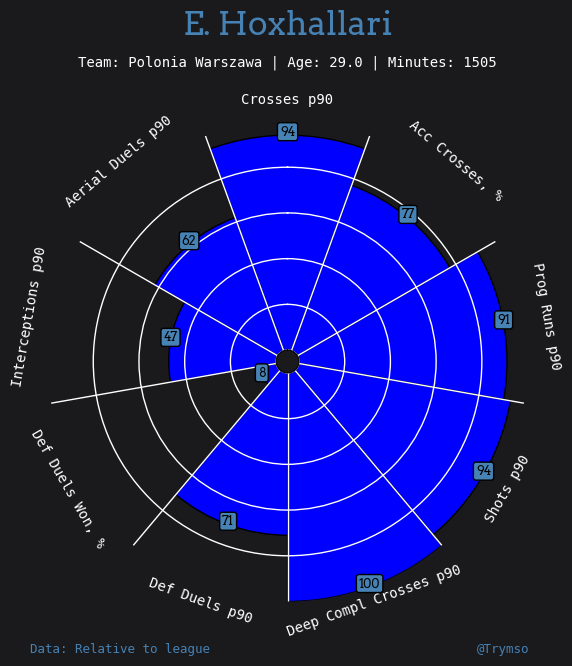

In [117]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager


def plot_radar(df_vback):

    font_path = 'Arvo-Regular.ttf'
    font_props = font_manager.FontProperties(fname=font_path)

    df_vback['Crosses p90'] = (df_vback["Crosses per 90"].rank(pct=True) * 100).astype(int)
    df_vback['Acc Crosses, %'] = (df_vback["Accurate crosses, %"].rank(pct=True) * 100).astype(int)
    df_vback['Prog Runs p90'] = (df_vback["Progressive runs per 90"].rank(pct=True) * 100).astype(int)
    df_vback['Shots p90'] = (df_vback["Shots per 90"].rank(pct=True) * 100).astype(int)
    df_vback['Deep Compl Crosses p90'] = (df_vback["Deep completed crosses per 90"].rank(pct=True) * 100).astype(int)
    df_vback['Def Duels p90'] = (df_vback["Defensive duels per 90"].rank(pct=True) * 100).astype(int)
    df_vback['Def Duels Won, %'] = (df_vback["Defensive duels won, %"].rank(pct=True) * 100).astype(int)
    df_vback['Interceptions p90'] = (df_vback["Interceptions per 90"].rank(pct=True) * 100).astype(int)
    df_vback['Aerial Duels p90'] = (df_vback["Aerial duels per 90"].rank(pct=True) * 100).astype(int)



    #Filtering and sorting which columns to use in radar
    columns_to_plot = [
        'Crosses p90', 'Acc Crosses, %', 'Prog Runs p90', 'Shots p90',
        'Deep Compl Crosses p90', 'Def Duels p90', 'Def Duels Won, %', 'Interceptions p90',
        'Aerial Duels p90'
    ]

    #Creating min and max value for radar
    radar = Radar(
        params=columns_to_plot,
        min_range=[0 for _ in columns_to_plot],
        max_range=[100 for _ in columns_to_plot]
    )

    slice_colors = ["#0000FF"] * 9 #+ #["#4682B4"] * 3



    #Players to plot
    #bobek = df_keeper[df_keeper['Player'] == 'A. Bobek']    
    player = df_vback[df_vback['Player'] == 'E. Hoxhallari']



    # Setup the pizza plot
    pizza = PyPizza(
        params=columns_to_plot,
        background_color='#1A1A1D',
        straight_line_color='white',
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_color='white',
        other_circle_ls='-',
        other_circle_lw=1
    )

    # Create the figure and plot
    fig, ax = pizza.make_pizza(
        figsize=(8, 8),  # Increase the figure size
        slice_colors=slice_colors, 
        values=list(player[columns_to_plot].values.flatten()),
        kwargs_values=dict(
            color='#000000', fontsize=9, fontproperties=font_props, 
            bbox={
                'edgecolor': 'black',
                'facecolor': '#4682B4',    #A52A2A  #8B0000 #0000FF #DA291C
                "boxstyle": 'round, pad= .2',
                "lw": 1
            }
        ),

        kwargs_slices=dict(
            facecolor="#FFFFFF",  # New color (example: red)
            edgecolor="black",  # White edge for the slices
            linewidth=1
        ),

        kwargs_params=dict(
            color='#FFFFFF',  # White color for the labels (change as needed)
            fontsize=10,  # Font size for the labels
            fontproperties='monospace' # Custom font
        )
    )

    # Adjust the margins to add space around the plot
    fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure

    fig.text(
    0.5, 0.87,
    f"Team: {player['Team'].iloc[0]} | Age: {player['Age'].iloc[0]} | Minutes: {player['Minutes played'].iloc[0]}",
    size=10, color="white", ha="center", fontproperties='monospace'
)



    # Add the title
    ax.text(x=.5, y=1.20, s=player['Player'].iloc[0], fontsize=24, weight='bold', c='#4682B4', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


    ax.text(
        x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
        s='Data: Relative to league',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )



    ax.text(
        x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
        s='@Trymso',  # Example subtext
        fontsize=9,  # Smaller font size for subtext
        color='#4682B4',  # Subtext color (white in this example)
        ha='center', 
        va='center', 
        fontproperties='monospace', 
        transform=ax.transAxes
    )

    fig.savefig('/Users/Trymso/Desktop/bobek_radar.png', dpi=300, bbox_inches='tight')  # Save directly
    print("Radar plot saved as bobek_radar.png")  # Confirmation message


plot_radar(df_vback)